In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**loading the data from kaggle**

In [16]:
# Set Kaggle API credentials
os.environ["KAGGLE_USERNAME"] = "himanshuvishwa0070"
os.environ["KAGGLE_KEY"] = "e23b004166236f4a5787539d80db6220"

# Download the dataset
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

red-wine-quality-cortez-et-al-2009.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("red-wine-quality-cortez-et-al-2009.zip", compression="zip")

In [18]:
# for first 5 rows 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# number of rows and columns in the dataset
df.shape

(1599, 12)

In [20]:
# for last 5 rows in our data set
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [21]:
# checking the missing velues
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
# get some information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
# statistical mesurement of dataset 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


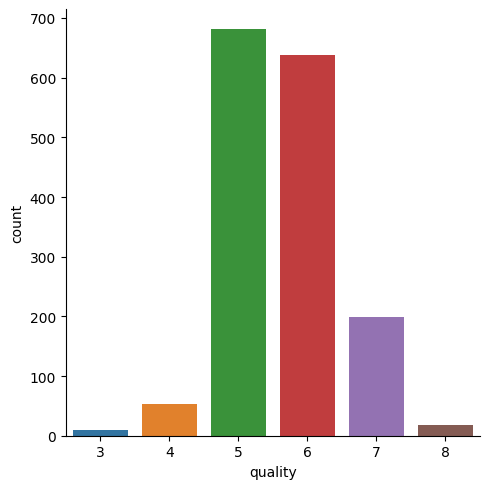

In [24]:
# number  of values fro ecach quality
sns.catplot(x='quality',data=df,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

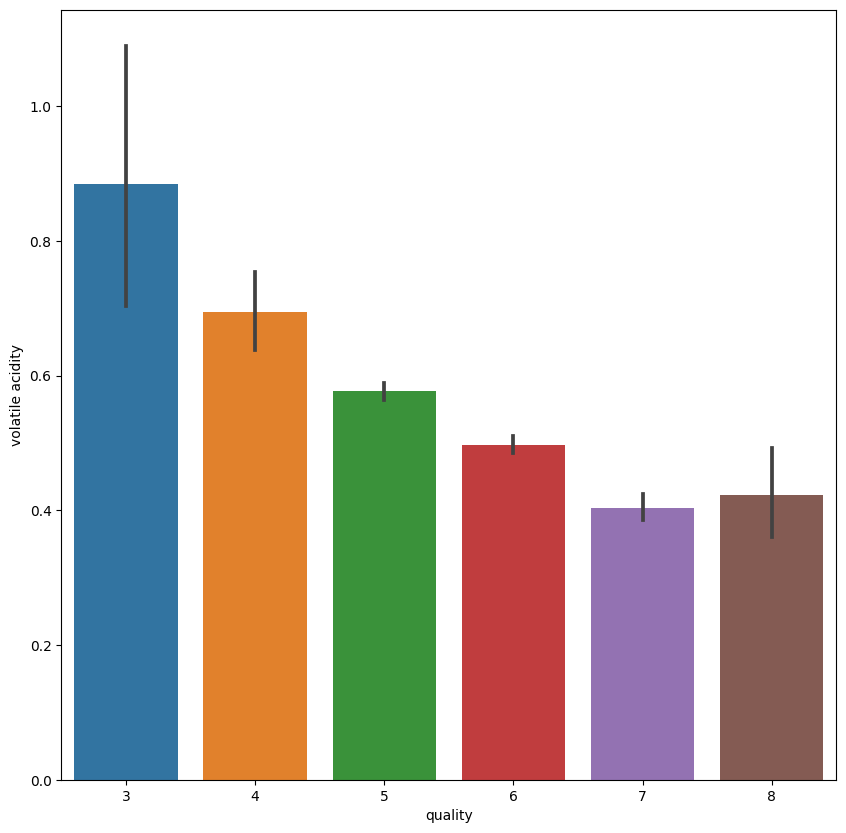

In [25]:
#  valatile acidity vs Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x='quality',y='volatile acidity',data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

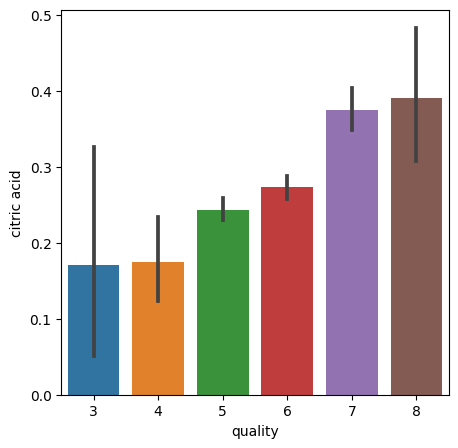

In [26]:
#   citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data = df)

**Correlation**

In [27]:
correlation=df.corr()

<Axes: >

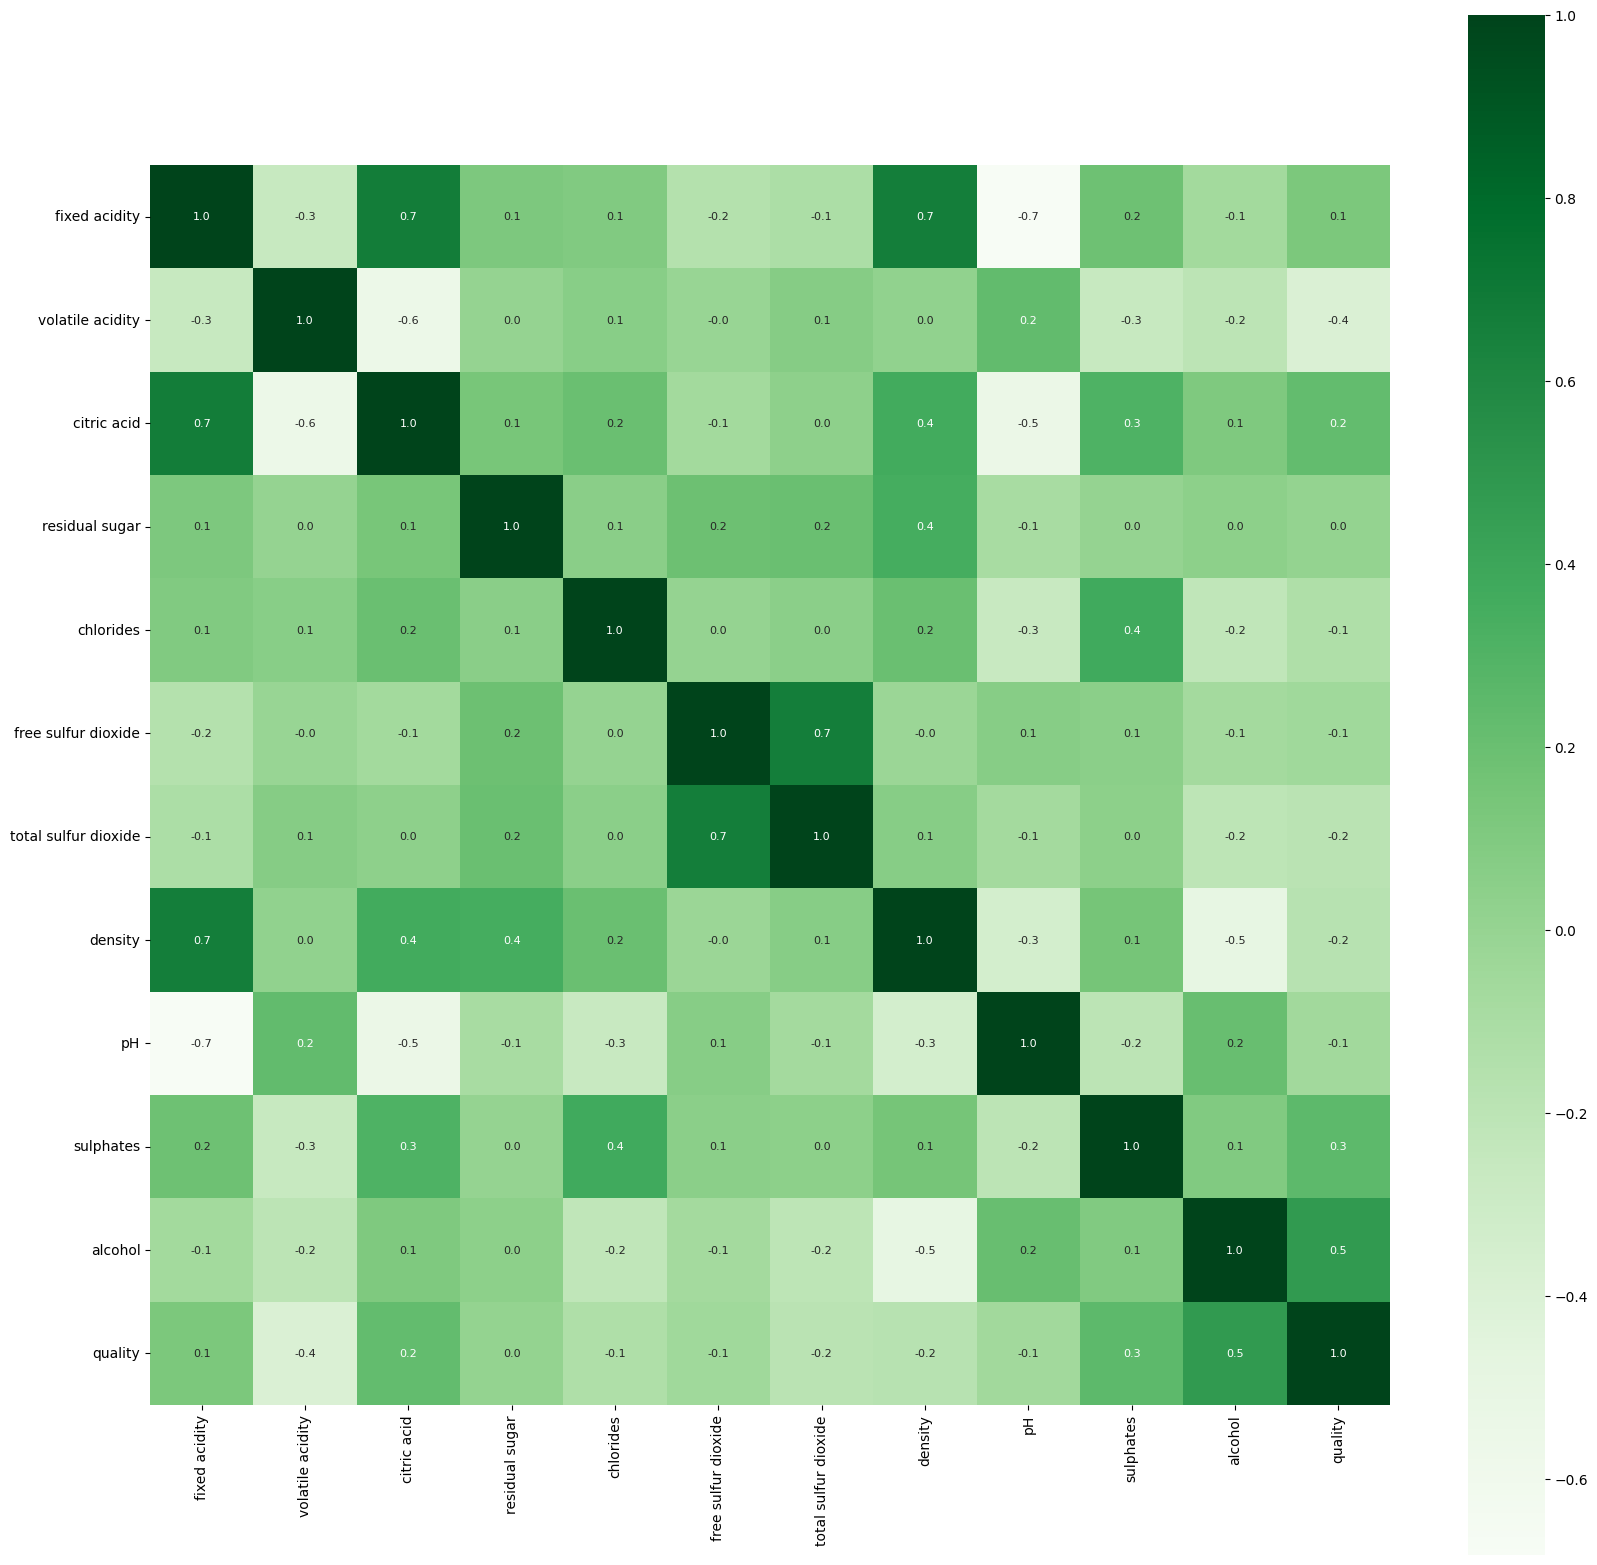

In [28]:
# construction a heatmap to understand the correlation between the colums
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Greens")

In [29]:
# separate the data and lables
X = df.drop('quality',axis=1)

**Label Binarization**

In [30]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [31]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [32]:
Y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

**Train and Test Split**

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)   

In [34]:
print(Y.shape, y_test.shape , y_train.shape)

(1599,) (320,) (1279,)


**Feading the data into Model**

In [35]:
clf = RandomForestClassifier()

In [36]:
clf.fit(x_train,y_train)

RandomForestClassifier()

**MODEL EVALUATION**

In [37]:
x_train_predit= clf.predict(x_train)
accuracy_score(x_train_predit,y_train)

1.0

In [38]:
x_test_predit = clf.predict(x_test)
accuracy_score(x_test_predit,y_test)

0.9125

In [39]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


c:\Users\hjha8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
